In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
balls=pd.read_csv('deliveries.csv')
matches=pd.read_csv('matches.csv')

In [3]:
balls.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras
0,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0
1,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0
2,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0
3,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0
4,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0


In [4]:
balls.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras
26114,45,2023/24,12-11-2023,"M Chinnaswamy Stadium, Bengaluru",2,47.1,Netherlands,India,PA van Meekeren,AT Nidamanuru,RG Sharma,0,0
26115,45,2023/24,12-11-2023,"M Chinnaswamy Stadium, Bengaluru",2,47.2,Netherlands,India,PA van Meekeren,AT Nidamanuru,RG Sharma,1,0
26116,45,2023/24,12-11-2023,"M Chinnaswamy Stadium, Bengaluru",2,47.3,Netherlands,India,AT Nidamanuru,PA van Meekeren,RG Sharma,0,0
26117,45,2023/24,12-11-2023,"M Chinnaswamy Stadium, Bengaluru",2,47.4,Netherlands,India,AT Nidamanuru,PA van Meekeren,RG Sharma,6,0
26118,45,2023/24,12-11-2023,"M Chinnaswamy Stadium, Bengaluru",2,47.5,Netherlands,India,AT Nidamanuru,PA van Meekeren,RG Sharma,0,0


## EDA

In [19]:
total_sixes=(balls['runs_off_bat']==6).sum()
total_sixes

644

In [20]:
total_fours=(balls['runs_off_bat']==4).sum()
total_fours

2241

([<matplotlib.patches.Wedge at 0x1d13af4e2d0>,
 [Text(0.8404204198958382, 0.7097136872162627, 'sixes'),
  Text(-0.8404204198958383, -0.7097136872162626, 'fours')],
 [Text(0.45841113812500256, 0.387116556663416, '22.3%'),
  Text(-0.4584111381250026, -0.38711655666341593, '77.7%')])

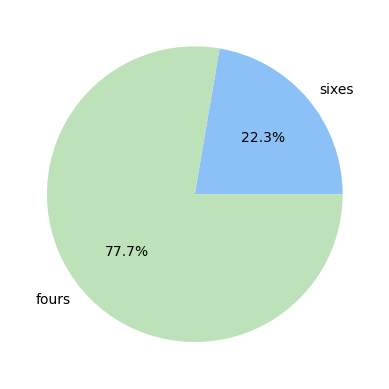

In [21]:
#Chart between total fours and total six

plt.pie([total_sixes,total_fours],labels=['sixes','fours'],autopct='%.1f%%', colors=['#8BC1F7','#BDE2B9'])

In [8]:
#top 10 players who hit most sixes
most_six=balls[balls['runs_off_bat']==6]
most_six.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10)


striker
RG Sharma       31
SS Iyer         24
DA Warner       24
GJ Maxwell      22
DJ Mitchell     22
MR Marsh        21
Q de Kock       21
DA Miller       20
H Klaasen       19
Fakhar Zaman    18
Name: runs_off_bat, dtype: int64

Text(0.5, 1.0, 'Top 10 players to hit most six in the season')

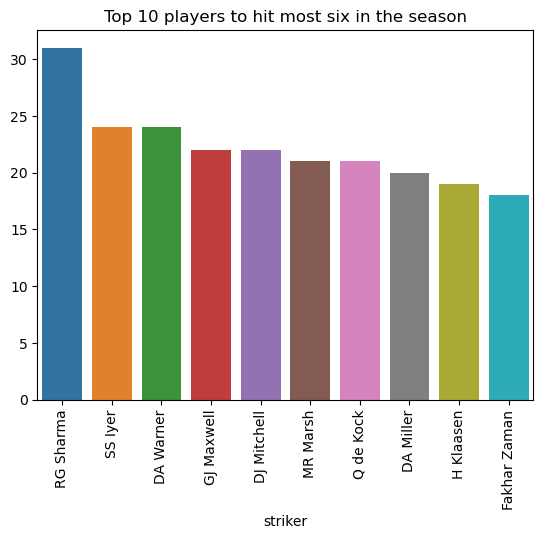

In [9]:
sns.barplot(x=most_six.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).index,y=most_six.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).values)
plt.xticks(rotation = 'vertical')
plt.title('Top 10 players to hit most six in the season')

In [75]:
#total six hit on each venue
most_six.groupby('venue')['runs_off_bat'].count().sort_values(ascending=False)

venue
Wankhede Stadium, Mumbai                                                 106
Arun Jaitley Stadium, Delhi                                               84
M Chinnaswamy Stadium, Bengaluru                                          83
Maharashtra Cricket Association Stadium, Pune                             75
Himachal Pradesh Cricket Association Stadium, Dharamsala                  70
MA Chidambaram Stadium, Chepauk, Chennai                                  60
Narendra Modi Stadium, Ahmedabad                                          54
Eden Gardens, Kolkata                                                     50
Rajiv Gandhi International Stadium, Uppal, Hyderabad                      35
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow     27
Name: runs_off_bat, dtype: int64

Text(0.5, 1.0, 'Total Number of Six hit in Venues')

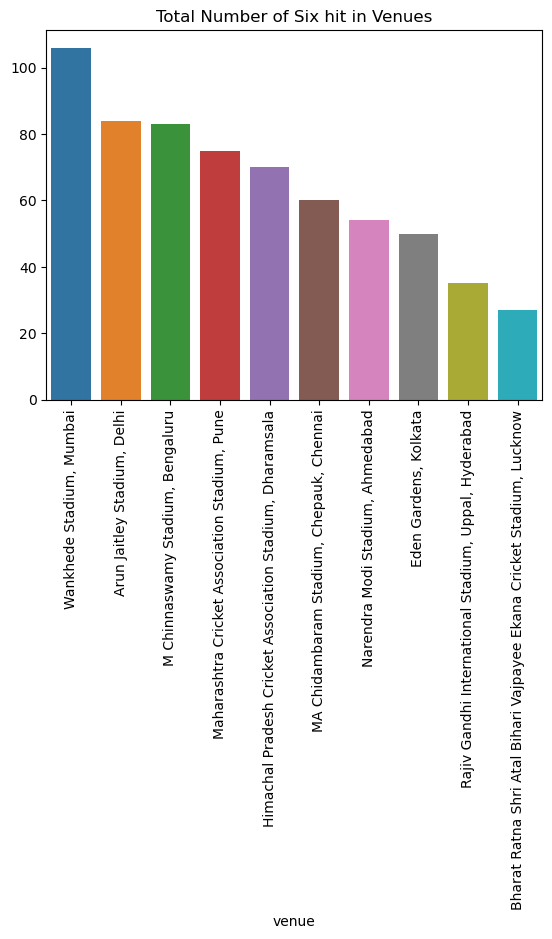

In [77]:
sns.barplot(x=most_six.groupby('venue')['runs_off_bat'].count().sort_values(ascending=False).index, y= most_six.groupby('venue')['runs_off_bat'].count().sort_values(ascending=False).values)
plt.xticks(rotation='vertical')
plt.title('Total Number of Six hit in Venues')

In [78]:
total_fours=balls[balls['runs_off_bat']==4]
total_fours.groupby('venue')['runs_off_bat'].count().sort_values(ascending=False)

venue
Arun Jaitley Stadium, Delhi                                              289
M Chinnaswamy Stadium, Bengaluru                                         260
Wankhede Stadium, Mumbai                                                 249
Himachal Pradesh Cricket Association Stadium, Dharamsala                 242
Eden Gardens, Kolkata                                                    220
Maharashtra Cricket Association Stadium, Pune                            219
Narendra Modi Stadium, Ahmedabad                                         212
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow    197
MA Chidambaram Stadium, Chepauk, Chennai                                 189
Rajiv Gandhi International Stadium, Uppal, Hyderabad                     164
Name: runs_off_bat, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Arun Jaitley Stadium, Delhi'),
  Text(1, 0, 'M Chinnaswamy Stadium, Bengaluru'),
  Text(2, 0, 'Wankhede Stadium, Mumbai'),
  Text(3, 0, 'Himachal Pradesh Cricket Association Stadium, Dharamsala'),
  Text(4, 0, 'Eden Gardens, Kolkata'),
  Text(5, 0, 'Maharashtra Cricket Association Stadium, Pune'),
  Text(6, 0, 'Narendra Modi Stadium, Ahmedabad'),
  Text(7, 0, 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow'),
  Text(8, 0, 'MA Chidambaram Stadium, Chepauk, Chennai'),
  Text(9, 0, 'Rajiv Gandhi International Stadium, Uppal, Hyderabad')])

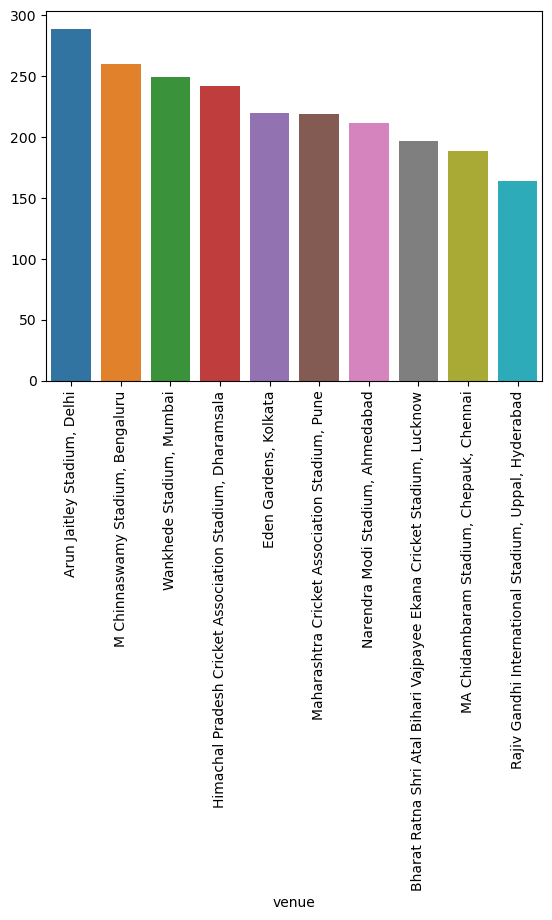

In [79]:
#total four hit on each venue
sns.barplot(x=total_fours.groupby('venue')['runs_off_bat'].count().sort_values(ascending=False).index , y=total_fours.groupby('venue')['runs_off_bat'].count().sort_values(ascending=False).values)
plt.xticks(rotation='vertical')

In [25]:
balls.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)

striker
V Kohli              765
RG Sharma            597
Q de Kock            594
R Ravindra           578
DJ Mitchell          552
DA Warner            535
SS Iyer              530
KL Rahul             452
HE van der Dussen    448
MR Marsh             441
Name: runs_off_bat, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'V Kohli'),
  Text(1, 0, 'RG Sharma'),
  Text(2, 0, 'Q de Kock'),
  Text(3, 0, 'R Ravindra'),
  Text(4, 0, 'DJ Mitchell'),
  Text(5, 0, 'DA Warner'),
  Text(6, 0, 'SS Iyer'),
  Text(7, 0, 'KL Rahul'),
  Text(8, 0, 'HE van der Dussen'),
  Text(9, 0, 'MR Marsh')])

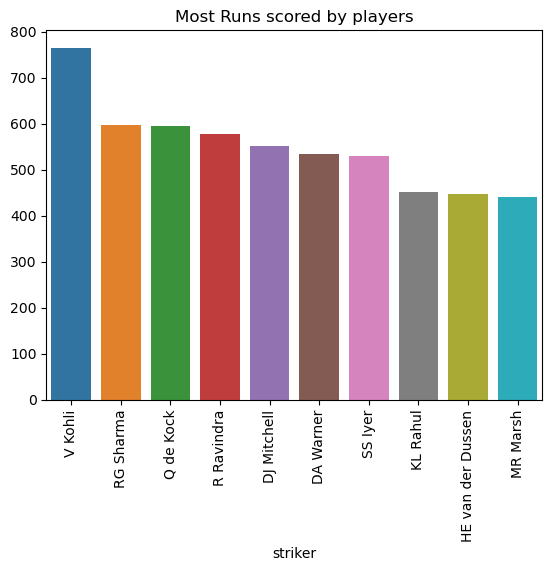

In [26]:
#highest runs in the world cup
sns.barplot(x=balls.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10).index , y=balls.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10).values)
plt.title("Most Runs scored by players")
plt.xticks(rotation='vertical')

In [27]:
balls.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras
0,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0
1,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0
2,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0
3,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0
4,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0


In [33]:
most_four= balls[balls['runs_off_bat']==4]
most_four.groupby('striker')['runs_off_bat'].count().sort_values(ascending = False).head(10)

striker
V Kohli        68
RG Sharma      66
Q de Kock      57
R Ravindra     55
DP Conway      54
DJ Malan       50
DA Warner      50
DJ Mitchell    48
AK Markram     44
P Nissanka     44
Name: runs_off_bat, dtype: int64

Text(0.5, 1.0, 'Most Fours hit in WC')

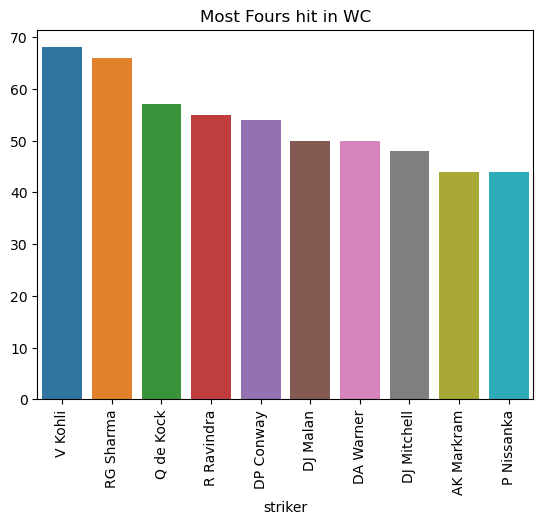

In [36]:
sns.barplot(x=most_four.groupby('striker')['runs_off_bat'].count().sort_values(ascending = False).head(10).index , y= most_four.groupby('striker')['runs_off_bat'].count().sort_values(ascending = False).head(10).values)
plt.xticks(rotation='vertical')
plt.title('Most Fours hit in WC')

In [40]:
# top 10 teams to score highest runs 

In [45]:
runs_per_match_per_team = balls.groupby(['match_id', 'batting_team'])['runs_off_bat'].sum().reset_index()
runs_per_match_per_team

,match_id,batting_team,runs_off_bat
0,1,England,276
1,1,New Zealand,275
2,2,Netherlands,196
3,2,Pakistan,277
4,3,Afghanistan,148
...,...,...,...
91,46,New Zealand,298
92,47,Australia,198
93,47,South Africa,201
94,48,Australia,223


In [46]:
total_runs_per_team = runs_per_match_per_team.groupby('batting_team')['runs_off_bat'].sum().reset_index()
total_runs_per_team

,batting_team,runs_off_bat
0,Afghanistan,1990
1,Australia,2945
2,Bangladesh,1944
3,England,2135
4,India,3038
5,Netherlands,1728
6,New Zealand,2712
7,Pakistan,2220
8,South Africa,2773
9,Sri Lanka,1942


In [48]:
total_runs_per_team.sort_values(by='runs_off_bat' ,ascending=False)

,batting_team,runs_off_bat
4,India,3038
1,Australia,2945
8,South Africa,2773
6,New Zealand,2712
7,Pakistan,2220
3,England,2135
0,Afghanistan,1990
2,Bangladesh,1944
9,Sri Lanka,1942
5,Netherlands,1728


Text(0.5, 1.0, 'Total runs scored in season')

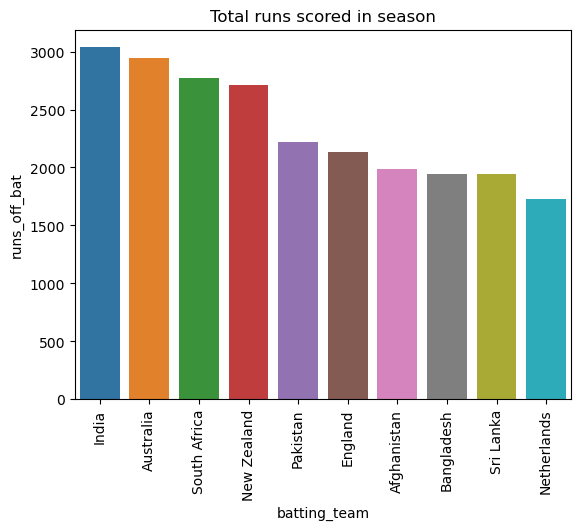

In [53]:
sns.barplot(x='batting_team' , y='runs_off_bat' , data=total_runs_per_team.sort_values(by='runs_off_bat' ,ascending=False))
plt.xticks(rotation='vertical')
plt.title("Total runs scored in season")

# Player Stats!!

In [145]:
def player_stats(name):
    player_name=name
    
    player_list=balls['striker'].unique().tolist()
    
    if name in player_list:
        Batsman=balls[balls['striker']== player_name]
        Matches=Batsman['match_id'].nunique()
        Runs = Batsman['runs_off_bat'].sum()
        runs_in_match=Batsman.groupby('match_id')['runs_off_bat'].sum().reset_index()
        runs_in_match
        fifties=0
        hundreads=0
        for i in runs_in_match['runs_off_bat']:
            if i>=50 and i<100:
                fifties+=1
            elif i>=100:
                hundreads+=1

        maximum=runs_in_match['runs_off_bat'].max()
        stats={
        'Name' : [name],
        'No. of Matches' : [Matches],
        'Total Runs' : [Runs],
        '50s': [fifties],
        '100s' : [hundreads],
        'Highest Score' : [maximum]
    }
    
        stats_df=pd.DataFrame(stats)

        return stats_df
        
    else:
        print('Player Not Found')
        
        
        
   

In [146]:
player_stats('V Kohli')

,Name,No. of Matches,Total Runs,50s,100s,Highest Score
0,V Kohli,11,765,6,3,117


In [147]:
player_stats('Himanshu')

Player Not Found
